# Canberra Real Estate Sales 2007-2019

## Introduction

Data was obtained from HtAG®. HtAG® or Higher than Average Growth is an analytics portal that assists real estate professionals, investors and home buyers in making property-related decisions with the help of timely and actionable real estate market data. HtAG® leverages the benefits of machine learning to rank the growth potential of over 420 Local Government Areas and 6,200 suburbs, Australia wide.

> #### Column Descriptions
- datesold = date when the property was sold
- price = price of the property when it was sold
- suburb = suburbs in Canberra, Australia
- postcode = post code of a place
- lat = latitude of the location
- lon = longitude of the location
- parking = number of parking lots
- bathrooms = number of bathrooms
- bedrooms = number of bedrooms
- propertyType = type of the property
- suburbid = the id of the suburbs

> #### Background Stories
- Fill me

> #### Questions
- What features affect the real estate prices in Canberra?
- What is the real estate prices in Canberra going to be like in the near future according to the given datasets?

> #### The Scope of the Research Problem
- Historical data from 2007 - 2019
- Maximum real estate price capped at 5M

> #### Users
- Fill me

## Data Cleaning and Visualization

> #### Import Modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

import warnings
warnings.filterwarnings('ignore')

sns.set()

> #### Import the Raw Dataset

In [2]:
raw_df = pd.read_csv('property_sales_canberra.csv')

In [3]:
raw_df.head()

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
0,9/06/2000,223000.0,Nicholls,2913,NaN,NaN,2,2.0,4,house,ACT708
1,1/01/2001,350000.0,Ngunnawal,2913,NaN,NaN,1,NaN,3,house,ACT706
2,11/12/2003,550000.0,Weston,2611,NaN,NaN,2,NaN,4,house,ACT441
3,21/09/2005,276000.0,Isabella Plains,2905,NaN,NaN,1,1.0,3,house,ACT612
4,1/11/2005,400000.0,Conder,2906,NaN,NaN,2,NaN,5,house,ACT613


## Preprocessing

> #### Descriptive Statistics of the Variables

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43178 entries, 0 to 43177
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datesold      43178 non-null  object 
 1   price         42435 non-null  float64
 2   suburb        43178 non-null  object 
 3   postcode      43178 non-null  int64  
 4   lat           42033 non-null  float64
 5   lon           42033 non-null  float64
 6   parking       43178 non-null  int64  
 7   bathrooms     42499 non-null  float64
 8   bedrooms      43178 non-null  int64  
 9   propertyType  43178 non-null  object 
 10  suburbid      43178 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.6+ MB


In [5]:
raw_df.describe(include='all')

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
count,43178,4.243500e+04,43178,43178.000000,42033.000000,42033.000000,43178.000000,42499.000000,43178.000000,43178,43178
unique,3851,NaN,107,NaN,NaN,NaN,NaN,NaN,NaN,2,107
top,28/10/2017,NaN,Kambah,NaN,NaN,NaN,NaN,NaN,NaN,house,ACT601
freq,56,NaN,1404,NaN,NaN,NaN,NaN,NaN,NaN,36236,1404
mean,NaN,6.037398e+05,NaN,2728.855644,-35.293447,149.096122,1.760017,1.643403,3.193501,NaN,NaN
std,NaN,3.139764e+05,NaN,146.564444,0.091796,0.040526,0.937361,0.644463,0.990638,NaN,NaN
min,NaN,5.000000e+04,NaN,2092.000000,-35.509975,148.921424,0.000000,1.000000,0.000000,NaN,NaN
25%,NaN,4.300000e+05,NaN,2607.000000,-35.363857,149.067390,1.000000,1.000000,3.000000,NaN,NaN
50%,NaN,5.390000e+05,NaN,2615.000000,-35.270536,149.099522,2.000000,2.000000,3.000000,NaN,NaN
75%,NaN,6.760000e+05,NaN,2905.000000,-35.212323,149.130708,2.000000,2.000000,4.000000,NaN,NaN


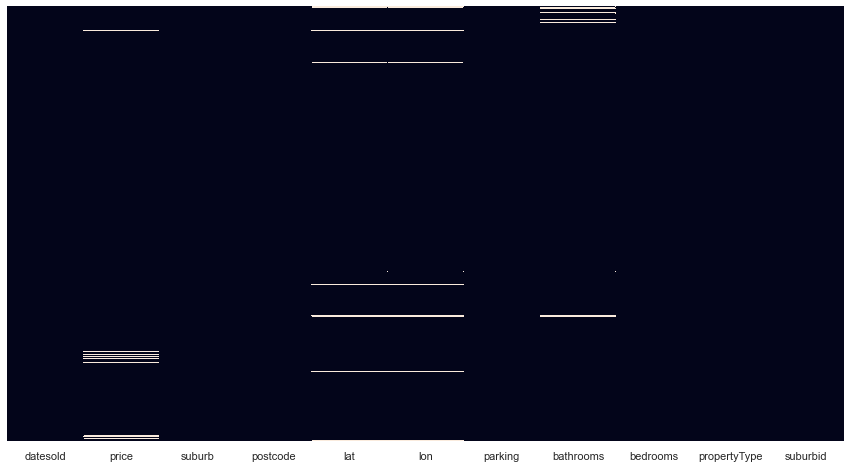

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(raw_df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [7]:
raw_df.isna().sum()

datesold           0
price            743
suburb             0
postcode           0
lat             1145
lon             1145
parking            0
bathrooms        679
bedrooms           0
propertyType       0
suburbid           0
dtype: int64

In [8]:
df = raw_df.copy()

- Determining numerical and categorical features

In [9]:
len(df.columns)  # checking

11

In [10]:
categorical_columns = df.describe(exclude='number').columns
numerical_columns = df.describe().columns

In [11]:
categorical_columns, len(categorical_columns)

(Index(['datesold', 'suburb', 'propertyType', 'suburbid'], dtype='object'), 4)

In [12]:
numerical_columns, len(numerical_columns)

(Index(['price', 'postcode', 'lat', 'lon', 'parking', 'bathrooms', 'bedrooms'], dtype='object'),
 7)

- Checking the distribution of the datasets numerical features through bar plots.

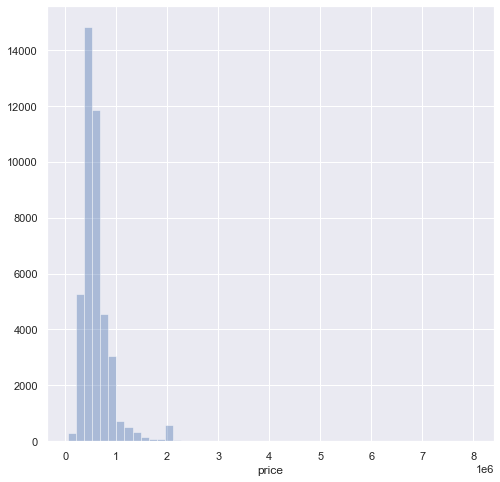

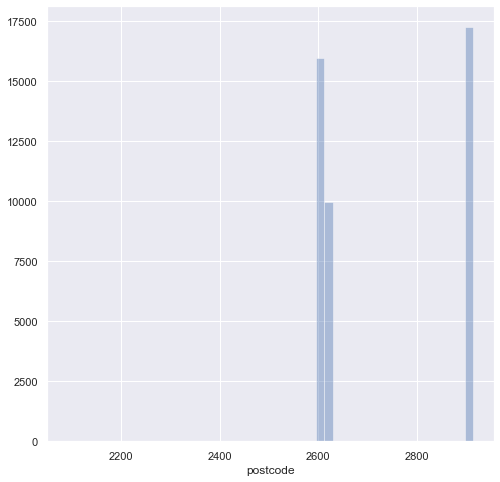

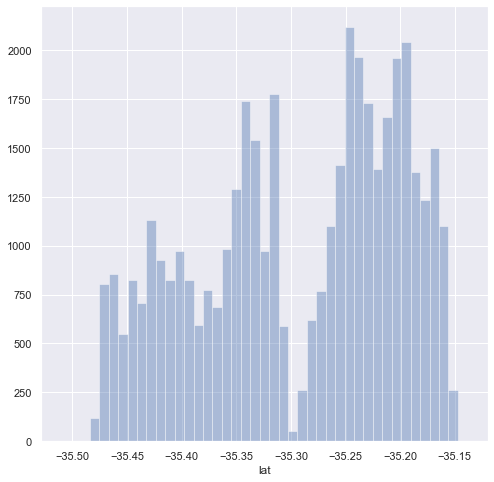

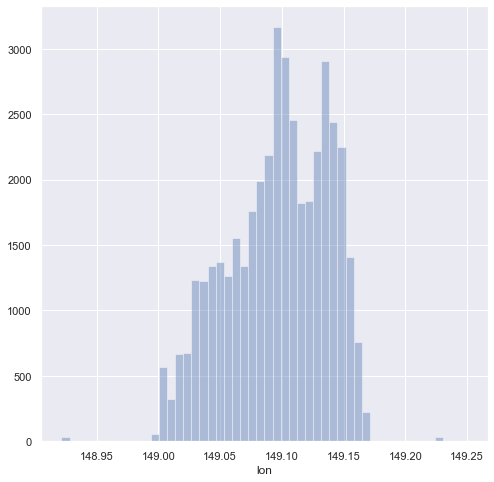

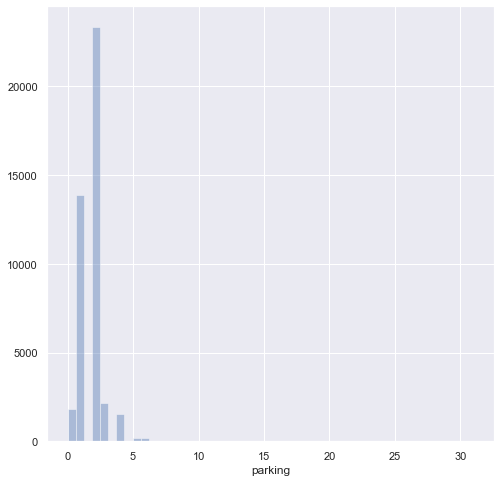

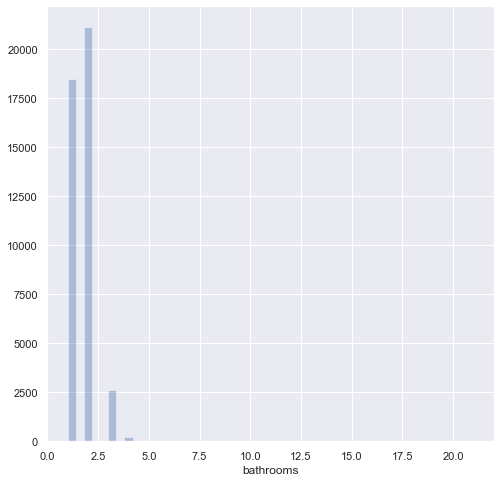

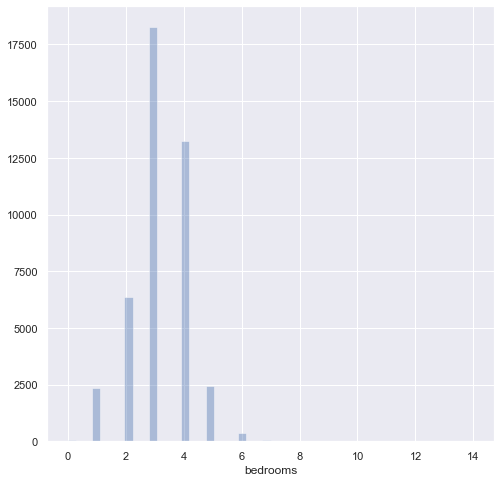

In [13]:
for i in numerical_columns:
    plt.figure(figsize = (8,8))
    sns.distplot(df[i], kde=False)

- Using scatter plot to see the relationship between 'price' column and other numerical columns

In [14]:
numerical_columns_noprice = numerical_columns.drop('price')
numerical_columns_noprice

Index(['postcode', 'lat', 'lon', 'parking', 'bathrooms', 'bedrooms'], dtype='object')

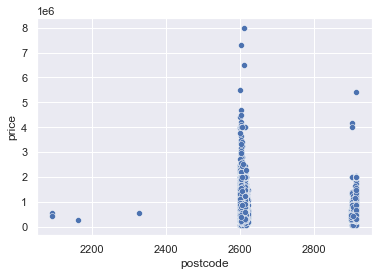

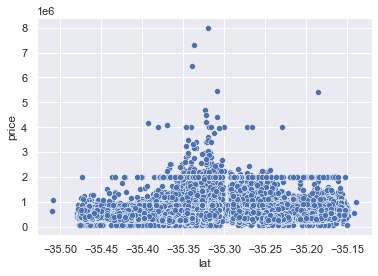

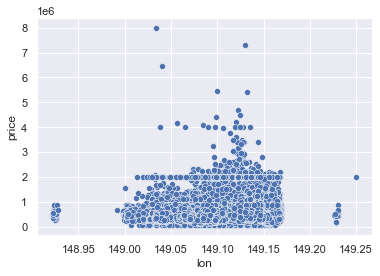

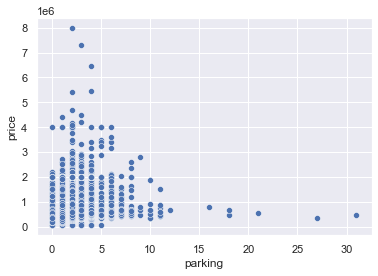

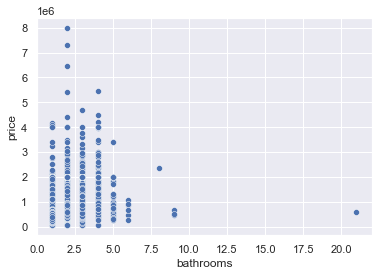

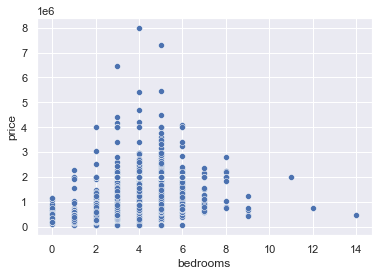

In [15]:
for i in numerical_columns_noprice:
    sns.scatterplot(df[i], df['price'])
    plt.show()

- Checking numerical features through describe method

In [16]:
df[numerical_columns].describe()

,price,postcode,lat,lon,parking,bathrooms,bedrooms
count,4.243500e+04,43178.000000,42033.000000,42033.000000,43178.000000,42499.000000,43178.000000
mean,6.037398e+05,2728.855644,-35.293447,149.096122,1.760017,1.643403,3.193501
std,3.139764e+05,146.564444,0.091796,0.040526,0.937361,0.644463,0.990638
min,5.000000e+04,2092.000000,-35.509975,148.921424,0.000000,1.000000,0.000000
25%,4.300000e+05,2607.000000,-35.363857,149.067390,1.000000,1.000000,3.000000
50%,5.390000e+05,2615.000000,-35.270536,149.099522,2.000000,2.000000,3.000000
75%,6.760000e+05,2905.000000,-35.212323,149.130708,2.000000,2.000000,4.000000
max,8.000000e+06,2914.000000,-35.138572,149.250290,31.000000,21.000000,14.000000


- Checking categorical features through describe method

In [17]:
df[categorical_columns].describe()

,datesold,suburb,propertyType,suburbid
count,43178,43178,43178,43178
unique,3851,107,2,107
top,28/10/2017,Kambah,house,ACT601
freq,56,1404,36236,1404


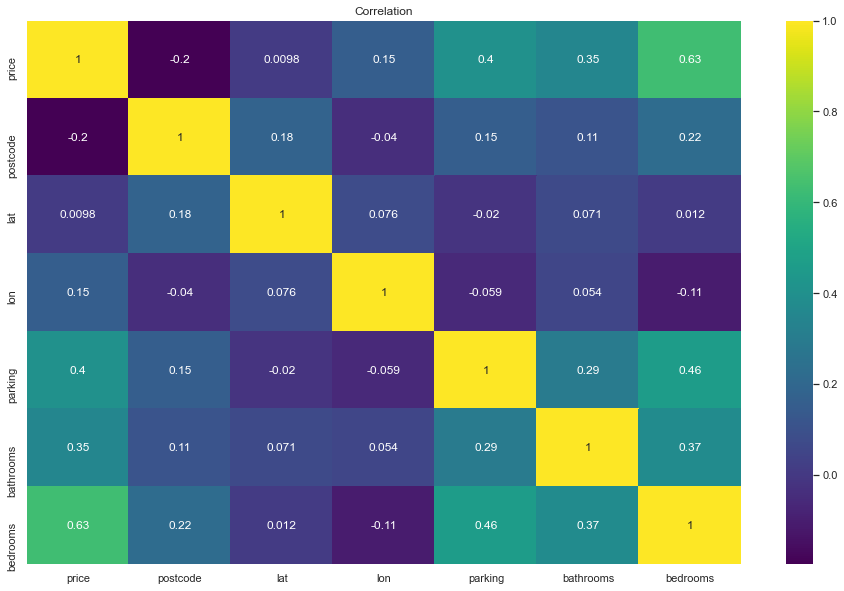

In [18]:
# Correlation Inspection

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='spearman'), annot= True, cmap = 'viridis')
plt.title('Correlation')
plt.show()

Through this heatmap it can be seen that 'lat' and 'lon' columns have relatively small correlation with the 'price' column, while 'bedrooms' has the highest.

> #### Removing Features

- Both 'lat' and 'lon' columns, that display latitude and longitude of a place respectively, are going to be dropped in this visualization notebook, since there are other columns such as 'suburb' and 'postcode' that conveys the location of the unit/ house.

In [19]:
# Removing 'lat' and 'lon'
df.drop(['lat', 'lon'], axis=1, inplace=True)

In [20]:
df.head(3)

,datesold,price,suburb,postcode,parking,bathrooms,bedrooms,propertyType,suburbid
0,9/06/2000,223000.0,Nicholls,2913,2,2.0,4,house,ACT708
1,1/01/2001,350000.0,Ngunnawal,2913,1,NaN,3,house,ACT706
2,11/12/2003,550000.0,Weston,2611,2,NaN,4,house,ACT441


- Column named 'suburbid' is going to be removed since it is literally just conveying the id of the suburbs from 'suburb' column

In [21]:
df['suburb'].nunique(), df['suburbid'].nunique()

(107, 107)

In [22]:
df.drop('suburbid', axis=1, inplace=True)

In [23]:
df.head(3)

,datesold,price,suburb,postcode,parking,bathrooms,bedrooms,propertyType
0,9/06/2000,223000.0,Nicholls,2913,2,2.0,4,house
1,1/01/2001,350000.0,Ngunnawal,2913,1,NaN,3,house
2,11/12/2003,550000.0,Weston,2611,2,NaN,4,house


- Checking the number of unique values in 'postcode' column

In [24]:
df['postcode'].value_counts()

2615    4961
2913    3929
2602    3479
2905    3203
2617    3082
2914    2776
2611    2708
2906    2457
2614    1828
2612    1787
2604    1648
2607    1523
2902    1406
2904    1266
2603    1230
2606    1075
2605    1049
2600    1029
2903     877
2912     670
2601     413
2911     338
2900     335
2620      39
2616      33
2609      17
2618      15
2092       1
2093       1
2163       1
2619       1
2326       1
Name: postcode, dtype: int64

For now, the outliers in 'postcode' column is not going to be dropped.

> #### Changing Data Type 

- Converting 'datesold' column data type to Date Type

In [25]:
df['datesold'] = pd.to_datetime(df['datesold'])
type(df['datesold'][0])  # checking

pandas._libs.tslibs.timestamps.Timestamp

> #### Dealing with Missing Values

In [26]:
df.isna().sum()

datesold          0
price           743
suburb            0
postcode          0
parking           0
bathrooms       679
bedrooms          0
propertyType      0
dtype: int64

- Missing values in the 'price' column are going to be removed as this analysis is depended on the historical data of this feature.

In [27]:
# Percentage of missing values in 'price' column compare to all entries

df['price_null'] = np.where(df['price'].isnull(), 1, 0)
print(f"Missing values ratio: {round(df['price_null'].mean()* 100, 3) }%")

Missing values ratio: 1.721%


In [28]:
# Removing missing values in 'price' column

df.drop(['price_null'], axis=1, inplace=True)
df = df.dropna(subset=['price'])

In [29]:
print(f"Null values in 'price' column: {df['price'].isna().sum()}")  # checking

Null values in 'price' column: 0


In [30]:
df.isna().sum()  # Checking the remaining missing values

datesold          0
price             0
suburb            0
postcode          0
parking           0
bathrooms       658
bedrooms          0
propertyType      0
dtype: int64

- Dealing with 'bathrooms' column missing values

In [31]:
# Percentage of missing values in 'bathrooms' column compare to all entries

df['bathrooms_null'] = np.where(df['bathrooms'].isnull(), 1, 0)
print(f"Missing values ratio: {df['bathrooms_null'].mean()}")

Missing values ratio: 0.015506068104159302


In [32]:
# Checking 'bathrooms' column before preprocessing technique

df.drop(['bathrooms_null'], axis=1, inplace=True)
min_b = df['bathrooms'].min()
max_b = df['bathrooms'].max()
mean_b = df['bathrooms'].mean()
median_b = df['bathrooms'].median()
std_b = df['bathrooms'].std()

print("Statistics for 'bathrooms' column before dropping missing values:\n")
print("Minimum 'bathrooms': ", min_b) 
print("Maximum 'bathrooms': ", max_b)
print("Mean 'bathrooms': ", mean_b)
print("Median 'bathrooms': ", median_b)
print("Standard deviation of 'bathrooms': ", std_b)

Statistics for 'bathrooms' column before dropping missing values:

Minimum 'bathrooms':  1.0
Maximum 'bathrooms':  21.0
Mean 'bathrooms':  1.6413337482346746
Median 'bathrooms':  2.0
Standard deviation of 'bathrooms':  0.6437348103230224


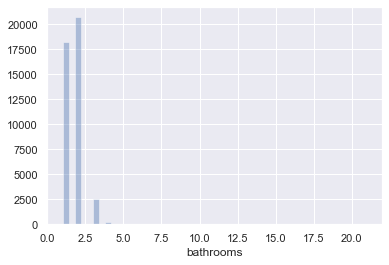

In [33]:
sns.distplot(df['bathrooms'], kde=False)
plt.show()

# Skewed distribution

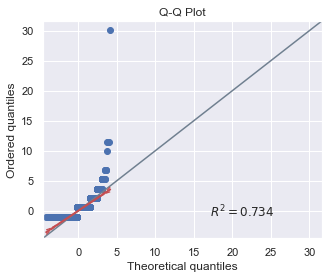

In [34]:
pg.qqplot(df.bathrooms, dist='norm')
plt.show()

# It can be seen from Q-Q Plot diagram below that 'bathrooms' column is not normally distributed.  

In [35]:
df['bathrooms'].value_counts()

2.0     20729
1.0     18201
3.0      2563
4.0       235
5.0        38
6.0         6
9.0         3
21.0        1
8.0         1
Name: bathrooms, dtype: int64

Replacing missing values in 'bathrooms' column with its median, since it is not possible replacing them with its mean because 'bathrooms' datasets are not normally distributed.

In [36]:
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['bathrooms'].isna().sum()

0

Converting 'bathrooms' column data type to integer

In [37]:
df['bathrooms'] = df['bathrooms'].astype(int)
type(df['bathrooms'][0])  # checking

numpy.int32

In [38]:
# Checking 'bathrooms' column after preprocessing technique

min_b2 = df['bathrooms'].min()
max_b2 = df['bathrooms'].max()
mean_b2 = df['bathrooms'].mean()
median_b2 = df['bathrooms'].median()
std_b2 = df['bathrooms'].std()

print("Statistics for 'bathrooms' column after dropping missing values:\n")
print("Minimum 'bathrooms': ", min_b2) 
print("Maximum 'bathrooms': ", max_b2)
print("Mean 'bathrooms': ", mean_b2)
print("Median 'bathrooms': ", median_b2)
print("Standard deviation of 'bathrooms': ", std_b2)

Statistics for 'bathrooms' column after dropping missing values:

Minimum 'bathrooms':  1
Maximum 'bathrooms':  21
Mean 'bathrooms':  1.6468952515612112
Median 'bathrooms':  2.0
Standard deviation of 'bathrooms':  0.6402597634352706


Standard deviation for 'bathrooms' column after filling its missing values with its median is almost the same as before preprocessing technique. There is only a small decline in standard deviation of 'bathroom' column after preprocessing process (it is barely noticable).

In [39]:
df.isna().sum()

datesold        0
price           0
suburb          0
postcode        0
parking         0
bathrooms       0
bedrooms        0
propertyType    0
dtype: int64

In [40]:
df.head()

,datesold,price,suburb,postcode,parking,bathrooms,bedrooms,propertyType
0,2000-09-06,223000.0,Nicholls,2913,2,2,4,house
1,2001-01-01,350000.0,Ngunnawal,2913,1,2,3,house
2,2003-11-12,550000.0,Weston,2611,2,2,4,house
3,2005-09-21,276000.0,Isabella Plains,2905,1,1,3,house
4,2005-01-11,400000.0,Conder,2906,2,2,5,house


In [41]:
# Updating categorical and numerical columns

categorical_columns = df.describe(exclude='number').columns
numerical_columns = df.describe().columns

In [42]:
#  Reordering Columns

df_categorical = df[categorical_columns]
df_numerical = df[numerical_columns]
df = pd.concat([df_numerical, df_categorical], axis=1)
df.head(3)

,price,postcode,parking,bathrooms,bedrooms,datesold,suburb,propertyType
0,223000.0,2913,2,2,4,2000-09-06,Nicholls,house
1,350000.0,2913,1,2,3,2001-01-01,Ngunnawal,house
2,550000.0,2611,2,2,4,2003-11-12,Weston,house


In [43]:
# NOTES:

# bulannya coba d grupin per musim ato kuartal
# coba 1 data pke postcode 1 data gpke postcode
# perminggu, perkuartal bulan/ musim
# kalo price mw scaling coba log > tpi ntr hasil prediksi d inverse log
#  parking, bathrooms, bedrooms > ttep bsa d scaling >untuk knn (klo tree based non scaling)

In [44]:
df.describe(include='all')

,price,postcode,parking,bathrooms,bedrooms,datesold,suburb,propertyType
count,4.243500e+04,42435.000000,42435.000000,42435.000000,42435.000000,42435,42435,42435
unique,NaN,NaN,NaN,NaN,NaN,3845,107,2
top,NaN,NaN,NaN,NaN,NaN,2017-10-28 00:00:00,Kambah,house
freq,NaN,NaN,NaN,NaN,NaN,56,1387,35627
first,NaN,NaN,NaN,NaN,NaN,2000-09-06 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2019-12-09 00:00:00,NaN,NaN
mean,6.037398e+05,2728.979592,1.758595,1.646895,3.193307,NaN,NaN,NaN
std,3.139764e+05,146.572504,0.937494,0.640260,0.989735,NaN,NaN,NaN
min,5.000000e+04,2092.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN
25%,4.300000e+05,2607.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN


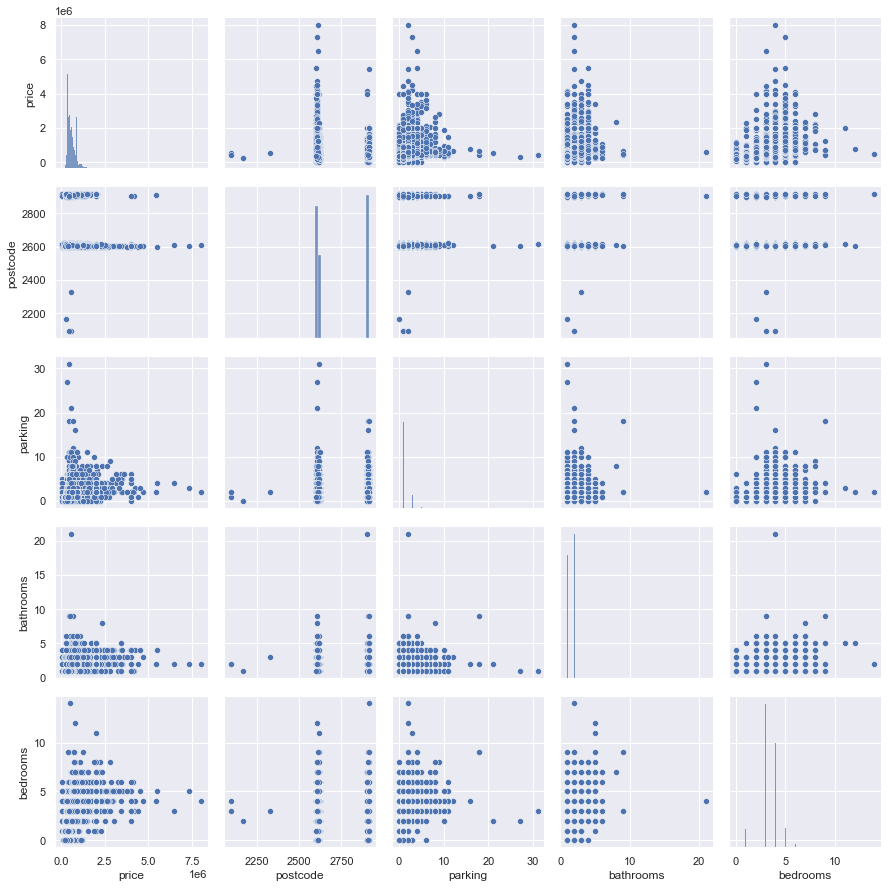

In [45]:
sns.pairplot(df, size=2.5, palette='mako') 
plt.tight_layout()

> #### Dealing with Outliers

In [46]:
def stats(feature):
    min_ = df[feature].min()
    max_ = df[feature].max()
    mean_ = df[feature].mean()
    median_ = df[feature].median()
    std_ = df[feature].std()

    print(f"Statistics for '{feature}' column:\n")
    print(f"Minimum '{feature}': ", min_)
    print(f"Maximum '{feature}': ", max_)
    print(f"Mean '{feature}': ", mean_)
    print(f"Median '{feature}': ", median_)
    print(f"Standard deviation of '{feature}': ", std_)
    
def detect_outlier_iqr(data):
    outliers=[]
    data_sorted = sorted(data)
    q1, q3= np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    
    for y in data_sorted:
        if y < lower_bound or y > upper_bound:
            outliers.append(y)
    return outliers

In [47]:
# NOTES:

# bikin data 2 coba 1 data isi outlier, 1 isi data ga outlier
# DecisionTreeRegressor, Random Forest Regressor, Gradient Boosting, Ridge Lasso, KNN regressor

In [48]:
# Checking the amount of outliers in the dataset based on 'lower whisker and upper whisker'

for i in df_numerical.columns:
    print(f"Number of outliers in '{i}' column: ", len(detect_outlier_iqr(df[i])))

Number of outliers in 'price' column:  2573
Number of outliers in 'postcode' column:  2
Number of outliers in 'parking' column:  1959
Number of outliers in 'bathrooms' column:  284
Number of outliers in 'bedrooms' column:  2771


Dropping outliers based on 'lower whisker and upper whisker' is not the best decission, since the datasets are already heavily skewed and dropping it might reduce a lot of valuable information. It is a must to examine the dataset from feature to feature.

In [49]:
numerical_columns

Index(['price', 'postcode', 'parking', 'bathrooms', 'bedrooms'], dtype='object')

- Checking outlier in 'price' columns

In [50]:
stats('price')

Statistics for 'price' column:

Minimum 'price':  50000.0
Maximum 'price':  8000000.0
Mean 'price':  603739.7770708142
Median 'price':  539000.0
Standard deviation of 'price':  313976.3626098973


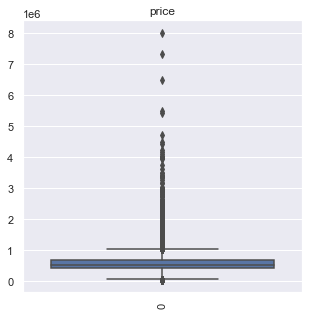

In [51]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['price'])
plt.xticks(rotation=90)
plt.title('price')
plt.show()

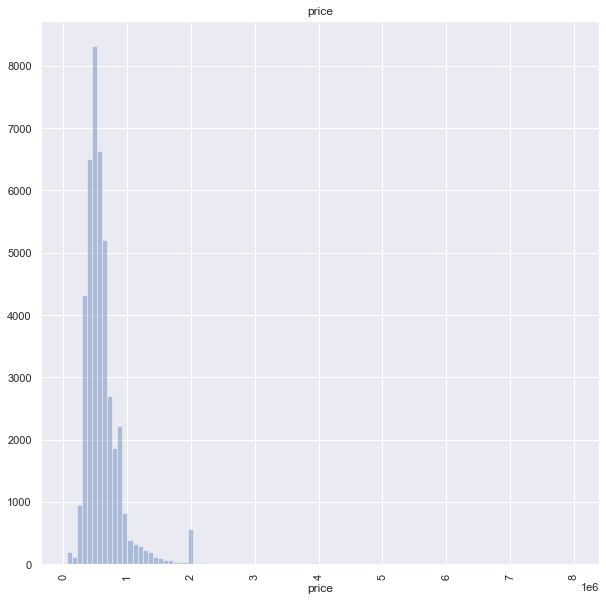

In [52]:
# Data is heavily right skewed

plt.figure(figsize=(10,10))
sns.distplot(df['price'], kde=False, bins=100)
plt.xticks(rotation=90)
plt.title('price')
plt.show()

In [53]:
# Creating 'PriceRange' column to better see where the distribution of the outliers

df['PriceRange'] = np.where(df['price'] <= 1000000, '0 - 1M',  
                                       np.where ((df['price'] > 1000000) & (df['price'] <= 2000000), '1M - 2M',
                                                np.where((df['price'] > 2000000) & (df['price'] <= 3000000), '2M - 3M',
                                                        np.where((df['price']>3000000) & (df['price']<=4000000), '3M - 4M',
                                                                np.where((df['price']>4000000) & (df['price']<=5000000), '4M - 5M',
                                                                        np.where((df['price']>5000000) & (df['price']<=6000000), '5M - 6M',
                                                                                np.where((df['price']>6000000) & (df['price']<=7000000), '6M - 7M', 
                                                                                         np.where((df['price']>7000000) & (df['price']<=8000000), '7M - 8M', 
                                                                                                 np.where((df['price']>8000000) & (df['price']<=9000000), '8M -9 M', ''
                                                                                                                 )))))))))

In [54]:
df.groupby(['PriceRange']).agg({'PriceRange': ['count']})

,PriceRange
,count
PriceRange,
0 - 1M,39837
1M - 2M,2449
2M - 3M,114
3M - 4M,24
4M - 5M,6
5M - 6M,2
6M - 7M,1
7M - 8M,2


__It can be seen from the table above:__

- 2 data items in the range 5M - 6M
- 1 data item in the range 6M - 7M
- 2 data items in the range 7M - 8M

For the purpose of this analysis, all dates that are mentioned above are going to be dropped. Hence, the maximum real estate for this analysis is capped at 5M.

In [55]:
df.drop(df[
    (df['PriceRange']=='5M - 6M') |
    (df['PriceRange']=='6M - 7M') |
    (df['PriceRange']=='7M - 8M') 
].index, inplace=True)

- Checking outlier in 'postcode' columns

In [56]:
df['postcode'].value_counts()

2615    4910
2913    3858
2602    3427
2905    3167
2617    3042
2914    2708
2611    2633
2906    2434
2614    1804
2612    1760
2604    1612
2607    1488
2902    1389
2904    1238
2603    1199
2606    1048
2605    1018
2600    1001
2903     865
2912     657
2601     406
2911     330
2900     330
2620      37
2616      33
2609      17
2618      14
2092       1
2093       1
2163       1
2619       1
2326       1
Name: postcode, dtype: int64

It can be seen from datas above that several postcodes only have 1 home/ unit. These postcodes are going to be dropped in this analysis.

In [57]:
list_postcode_drop = [2092, 2093, 2163, 2619, 2326]
list_postcode_drop_index = df[df['postcode'].isin(list_postcode_drop)].index
df.drop(list_postcode_drop_index, inplace=True)

In [58]:
df[df['postcode'].isin(list_postcode_drop)].index  # checking the missing values after dropping them

Int64Index([], dtype='int64')

In [59]:
df['postcode'].value_counts()  # checking the missing values after dropping them

2615    4910
2913    3858
2602    3427
2905    3167
2617    3042
2914    2708
2611    2633
2906    2434
2614    1804
2612    1760
2604    1612
2607    1488
2902    1389
2904    1238
2603    1199
2606    1048
2605    1018
2600    1001
2903     865
2912     657
2601     406
2900     330
2911     330
2620      37
2616      33
2609      17
2618      14
Name: postcode, dtype: int64

- Checking outlier in 'parking' columns

In [60]:
df['parking'].value_counts()

2     22896
1     13650
3      2100
0      1822
4      1487
5       194
6       185
7        33
8        27
10       11
11        9
9         4
18        2
27        1
12        1
16        1
21        1
31        1
Name: parking, dtype: int64

__It can be seen from the table above:__

- 2 data items have 18 parking lots
- 1 data item has 27 parking lots
- 1 data item has 12 parking lots
- 1 data item has 16 parking lots
- 1 data item has 21 parking lots
- 1 data item has 31 parking lots

For the purpose of this analysis, all datas that are mentioned above are going to be dropped

In [61]:
list_parking_drop = [18, 27, 12, 16, 21, 31]
list_parking_drop_index = df[df['parking'].isin(list_parking_drop)].index
df.drop(list_parking_drop_index, inplace=True)

In [62]:
df[df['parking'].isin(list_parking_drop)].index  # checking the missing values after dropping them

Int64Index([], dtype='int64')

In [63]:
df['parking'].value_counts()  # checking the missing values after dropping them

2     22896
1     13650
3      2100
0      1822
4      1487
5       194
6       185
7        33
8        27
10       11
11        9
9         4
Name: parking, dtype: int64

- Checking outlier in 'bathrooms' columns

In [64]:
df['bathrooms'].value_counts()

2     21377
1     18198
3      2561
4       234
5        38
6         6
9         2
21        1
8         1
Name: bathrooms, dtype: int64

In [65]:
df.drop(df[
    (df['bathrooms']==9) |
    (df['bathrooms']==21) |
    (df['bathrooms']==8) 
].index, inplace=True)

__It can be seen from the table above:__

- 2 data items have 9 bathrooms
- 1 data item has 21 bathrooms
- 1 data item has 8 bathrooms

For the purpose of this analysis, all datas that are mentioned above are going to be dropped

In [66]:
df['bathrooms'].value_counts()  # checking the missing values after dropping them

2    21377
1    18198
3     2561
4      234
5       38
6        6
Name: bathrooms, dtype: int64

- Checking outlier in 'bedrooms' columns

In [67]:
df['bedrooms'].value_counts()

3     17996
4     13006
2      6249
5      2395
1      2310
6       352
7        53
0        37
8        10
9         3
14        1
12        1
11        1
Name: bedrooms, dtype: int64

In [68]:
df.drop(df[
    (df['bedrooms']==9) |
    (df['bedrooms']==14) |
    (df['bedrooms']==12) |
    (df['bedrooms']==11) 
].index, inplace=True)

__It can be seen from the table above:__

- 3 data items have 9 bedrooms
- 1 data item has 14 bedrooms
- 1 data item has 12 bedrooms
- 1 data item has 11 bedrooms

For the purpose of this analysis, all datas that are mentioned above are going to be dropped

In [69]:
df['bedrooms'].value_counts()  # checking the missing values after dropping them

3    17996
4    13006
2     6249
5     2395
1     2310
6      352
7       53
0       37
8       10
Name: bedrooms, dtype: int64

## Visualization

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42408 entries, 0 to 43177
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         42408 non-null  float64       
 1   postcode      42408 non-null  int64         
 2   parking       42408 non-null  int64         
 3   bathrooms     42408 non-null  int32         
 4   bedrooms      42408 non-null  int64         
 5   datesold      42408 non-null  datetime64[ns]
 6   suburb        42408 non-null  object        
 7   propertyType  42408 non-null  object        
 8   PriceRange    42408 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(3)
memory usage: 3.1+ MB


In [71]:
df.describe(include='all')

,price,postcode,parking,bathrooms,bedrooms,datesold,suburb,propertyType,PriceRange
count,4.240800e+04,42408.000000,42408.000000,42408.000000,42408.000000,42408,42408,42408,42408
unique,NaN,NaN,NaN,NaN,NaN,3843,107,2,5
top,NaN,NaN,NaN,NaN,NaN,2017-10-28 00:00:00,Kambah,house,0 - 1M
freq,NaN,NaN,NaN,NaN,NaN,56,1386,35602,39818
first,NaN,NaN,NaN,NaN,NaN,2000-09-06 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2019-12-09 00:00:00,NaN,NaN,NaN
mean,6.029798e+05,2729.047939,1.755117,1.645374,3.191803,NaN,NaN,NaN,NaN
std,3.069784e+05,146.478107,0.902358,0.628884,0.984635,NaN,NaN,NaN,NaN
min,5.000000e+04,2600.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,4.300000e+05,2607.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN


In [72]:
df.head(3)

,price,postcode,parking,bathrooms,bedrooms,datesold,suburb,propertyType,PriceRange
0,223000.0,2913,2,2,4,2000-09-06,Nicholls,house,0 - 1M
1,350000.0,2913,1,2,3,2001-01-01,Ngunnawal,house,0 - 1M
2,550000.0,2611,2,2,4,2003-11-12,Weston,house,0 - 1M


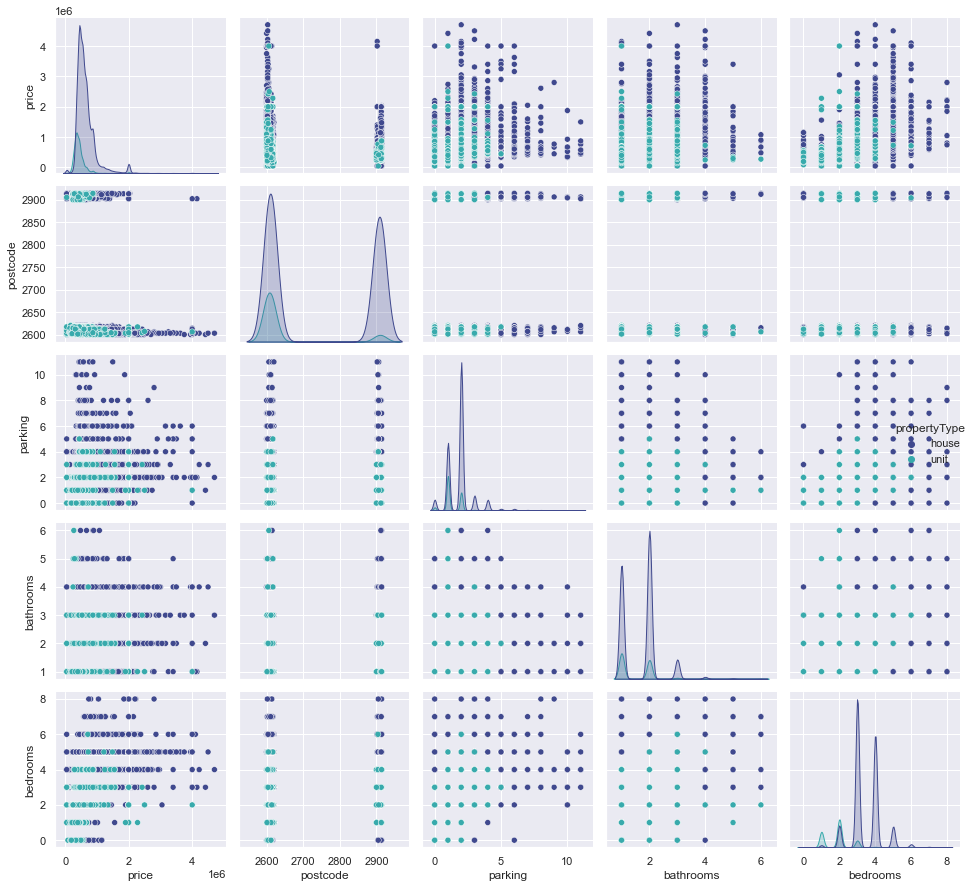

In [73]:
sns.pairplot(df, size=2.5, hue='propertyType', palette='mako') 
plt.tight_layout()

It can be seen from diagram above that generally the price of a house is more expensive than a unit

- Splitting 'datesold' column

In [74]:
df['yearsold'] = df['datesold'].dt.year

In [75]:
df['monthsold'] = df['datesold'].dt.month

In [76]:
df['daysold'] = df['datesold'].dt.day

- Dividing 'monthsold' column based on 4 quarters

In [77]:
df['quarters'] = np.where((df['monthsold'] >= 1) & (df['monthsold'] <= 3), 'q1',
                        np.where((df['monthsold'] >= 4) & (df['monthsold'] <= 6), 'q2',
                                np.where((df['monthsold'] >= 7) & (df['monthsold'] <= 9), 'q3', 'q4')))
df['quarters'].value_counts()

q4    11036
q3    10771
q2    10308
q1    10293
Name: quarters, dtype: int64

- Dividing 'monthsold' column based on 4 seasons

In [78]:
df['seasons'] = np.where((df['monthsold'] >= 3) & (df['monthsold'] <= 5), 'spring',
                        np.where((df['monthsold'] >= 6) & (df['monthsold'] <= 8), 'summer',
                                np.where((df['monthsold'] >= 9) & (df['monthsold'] <= 11), 'fall', 'winter')))
df['seasons'].value_counts()

fall      11346
spring    10860
summer    10422
winter     9780
Name: seasons, dtype: int64

In [79]:
df.head(3)

,price,postcode,parking,bathrooms,bedrooms,datesold,suburb,propertyType,PriceRange,yearsold,monthsold,daysold,quarters,seasons
0,223000.0,2913,2,2,4,2000-09-06,Nicholls,house,0 - 1M,2000,9,6,q3,fall
1,350000.0,2913,1,2,3,2001-01-01,Ngunnawal,house,0 - 1M,2001,1,1,q1,winter
2,550000.0,2611,2,2,4,2003-11-12,Weston,house,0 - 1M,2003,11,12,q4,fall


- Canberra real estate pricing trend throughout the years based on its property type

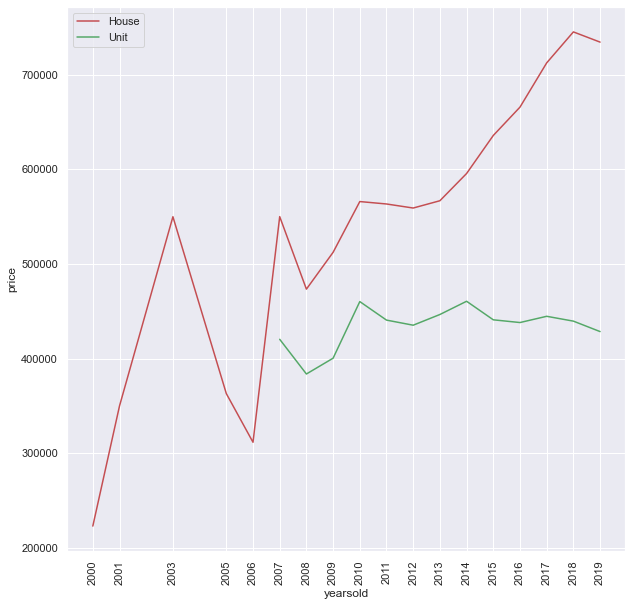

In [80]:
df_house_year = df[df['propertyType']=='house'].groupby('yearsold').mean()
df_unit_year = df[df['propertyType']=='unit'].groupby('yearsold').mean()
list_year = sorted(df['yearsold'].value_counts().index)

plt.figure(figsize=(10,10))

df_house_year['price'].plot(kind='line', color='r',label='House')
df_unit_year['price'].plot(kind='line', color='g',label='Unit')

plt.ylabel('price')
plt.xticks(list_year, rotation=90)
plt.legend()
plt.show()

The line graph indicates that throughout 2000 to 2019, house prices experienced a huge upward trend even though there was a huge dip in 2006. Meanwhile, unit price remained relatively stable from 2007 to 2019 and only experienced slight fluctuations throughout the period. However, through this graph it can also be seen that there is a lot of missing datas before 2007, thus datas with year 2007 are going to be dropped. 

In [81]:
# Checking the amount of data that needs to be dropped

df[df['yearsold']<2007]['price'].count()

42

In [82]:
# Dropping the datas

df.drop(df[df['yearsold']<2007].index, inplace=True)
df['yearsold'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019], dtype=int64)

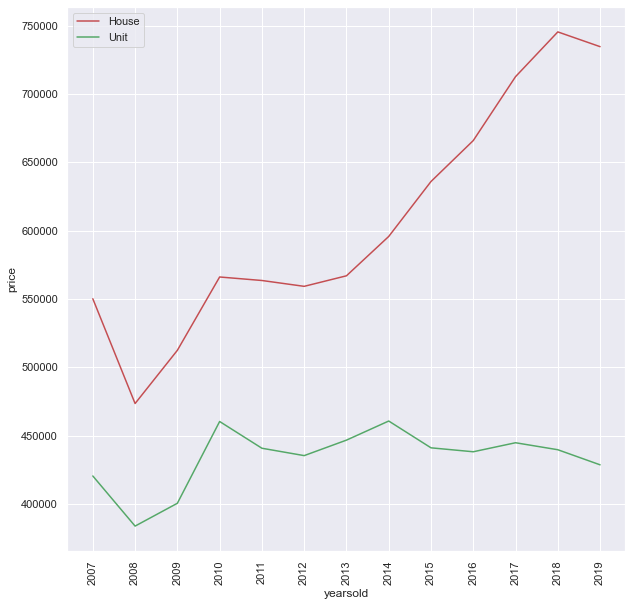

In [83]:
# The aftermath after dropping datas before 2007.

df_house_year = df[df['propertyType']=='house'].groupby('yearsold').mean()
df_unit_year = df[df['propertyType']=='unit'].groupby('yearsold').mean()
list_year = sorted(df['yearsold'].value_counts().index)

plt.figure(figsize=(10,10))

df_house_year['price'].plot(kind='line', color='r',label='House')
df_unit_year['price'].plot(kind='line', color='g',label='Unit')

plt.ylabel('price')
plt.xticks(list_year, rotation=90)
plt.legend()
plt.show()

- Performance of real estate sales based on yearly quarters and seasons

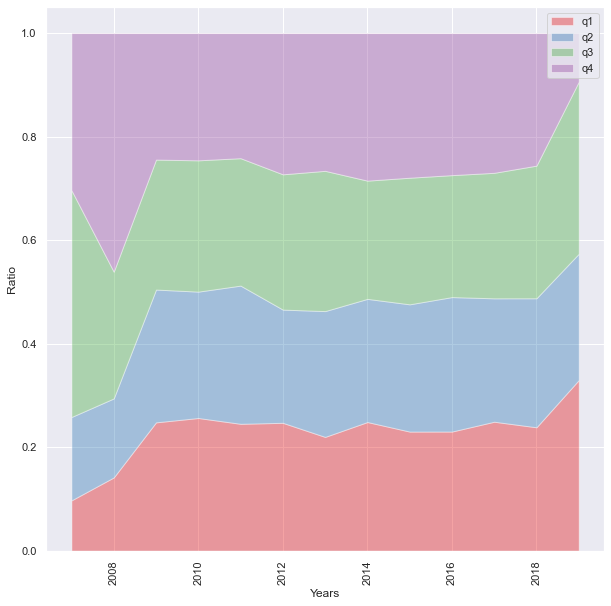

In [84]:
# Creating the ratios based on quarterly sales per year
list_year = sorted(df['yearsold'].value_counts().index)
list_ratio_quarters = [df[df['yearsold']==i]['quarters'].value_counts(normalize=True) for i in list_year]

# Creating a ratio dataframe for all sales that happen throughout the period based on its quarters
df_list_ratio_quarters = pd.DataFrame(list_ratio_quarters)
df_list_ratio_quarters.reset_index(inplace=True)
df_list_ratio_quarters.fillna(0, inplace=True)
df_list_ratio_quarters  # checking

# Creating series based on its quarters
list_ratio_q1 = [df_list_ratio_quarters.loc[:,'q1']]
list_ratio_q2 = [df_list_ratio_quarters.loc[:,'q2']]
list_ratio_q3 = [df_list_ratio_quarters.loc[:,'q3']]
list_ratio_q4 = [df_list_ratio_quarters.loc[:,'q4']]

list_vstack = np.vstack([list_ratio_q1, list_ratio_q2, list_ratio_q3, list_ratio_q4])

pal = sns.color_palette("Set1")
plt.figure(figsize=(10,10))
plt.stackplot(list_year, list_vstack, labels=('q1', 'q2', 'q3', 'q4'),colors=pal, alpha=0.4)
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.xticks(rotation=90)
plt.legend()
plt.show()


Throughout 2007 to 2019 there are some fluctuations in the amount of real estate sales per quarter. However, the ratios of sales among all quarters are relatively the same during this period. In addition, only the 4th quarter experienced a decline in real estate sales in 2019.

In [85]:
list_rasio_seasons = [df[df['yearsold']==i]['seasons'].value_counts(normalize=True) for i in list_year]
list_rasio_seasons[0]  # checking

summer    0.408240
fall      0.314607
winter    0.157303
spring    0.119850
Name: seasons, dtype: float64

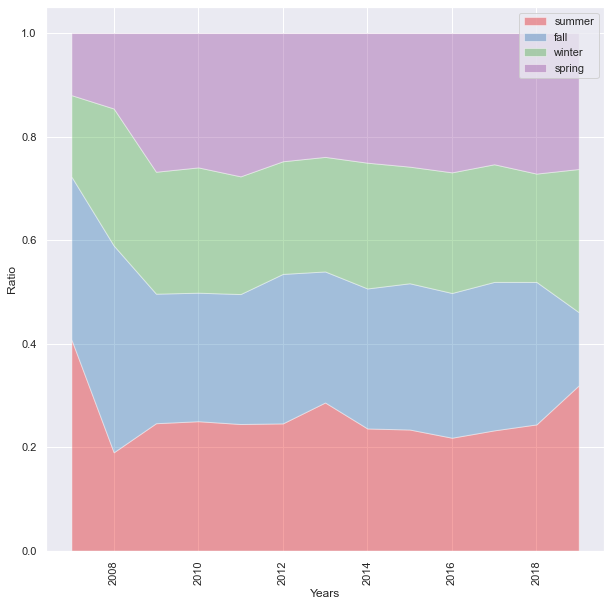

In [86]:
# Creating the ratios of real estate sales based on seasons per year

list_year = sorted(df['yearsold'].value_counts().index)
list_ratio_seasons = [df[df['yearsold']==i]['seasons'].value_counts(normalize=True) for i in list_year]

# Creating a ratio dataframe for all sales that happen throughout the period based on its seasons
df_list_ratio_seasons = pd.DataFrame(list_ratio_seasons)
df_list_ratio_seasons.reset_index(inplace=True)
df_list_ratio_seasons.fillna(0, inplace=True)
df_list_ratio_seasons  # checking

# Creating series based on its quarters
list_ratio_summer = [df_list_ratio_seasons.loc[:,'summer']]
list_ratio_fall = [df_list_ratio_seasons.loc[:,'fall']]
list_ratio_winter = [df_list_ratio_seasons.loc[:,'winter']]
list_ratio_spring = [df_list_ratio_seasons.loc[:,'spring']]

list_vstack = np.vstack([list_ratio_summer, list_ratio_fall, list_ratio_winter, list_ratio_spring])

pal = sns.color_palette("Set1")
plt.figure(figsize=(10,10))
plt.stackplot(list_year, list_vstack, labels=('summer', 'fall', 'winter', 'spring'),colors=pal, alpha=0.4)
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.xticks(rotation=90)
plt.legend()
plt.show()

It can be seen through the stack plot that the amount of real estate sales in the winter season is commonly lower than other seasons.

- Ranking of suburbs in Canberra based on their contribution to real estate sales throughout the period

In [87]:
# Creating a df_suburb table

df_suburb = df.groupby('suburb').count()['price'].sort_values(ascending=False)
df_suburb = df_suburb.reset_index()
df_suburb.rename(columns={'price': 'amount_of_sales'}, inplace=True)

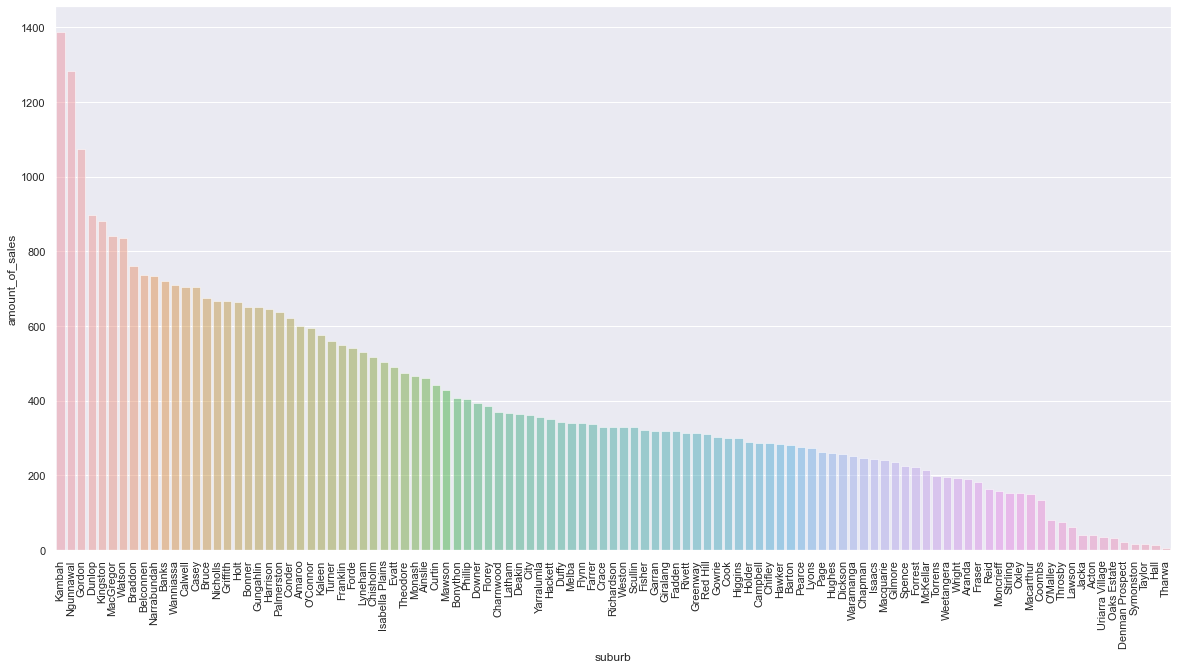

In [88]:
# Creating a bar plot for all real estate sales throughout the years based on its suburbs

plt.figure(figsize=(20,10))
sns.barplot(df_suburb['suburb'], df_suburb['amount_of_sales'], alpha=0.5)
plt.xticks(rotation=90)
plt.show()

In [89]:
# Creating df_suburb_yearsold (mean)

df_suburb_yearsold = df.groupby(['suburb', 'yearsold']).mean()[['price']].reset_index()

In [90]:
# Creating df_suburb_yearsold2 (count)

df_suburb_yearsold2 = df.groupby(['suburb', 'yearsold']).count()[['price']].reset_index()

In [135]:
# 5 Suburbs with the highest amount of sales

# latest_yearsold, latest_mean_price
df_suburb_head = df_suburb.copy()
suburb_head_syear = [df_suburb_yearsold[df_suburb_yearsold['suburb']==i]['yearsold'].iloc[-1] for i in df_suburb_head['suburb']]
suburb_head_sprice = [df_suburb_yearsold[df_suburb_yearsold['suburb']==i]['price'].iloc[-1] for i in df_suburb_head['suburb']]
df_suburb_head['latest_yearsold'], df_suburb_head['latest_mean_price'] = suburb_head_syear, suburb_head_sprice

# latest_number_sales
suburb_head_snum = [df_suburb_yearsold2[df_suburb_yearsold2['suburb']==i]['price'].iloc[-1] for i in df_suburb_head['suburb']]
df_suburb_head['latest_number_sales'] = suburb_head_snum

# latest_num_house, latest_num_unit
list_series_property_1a = [df[(df['suburb']==i) & (df['yearsold']==j)]['propertyType'].value_counts() for i, j in zip(df_suburb_head['suburb'], df_suburb_head['latest_yearsold'])]
df_suburb_head['latest_num_house'], df_suburb_head['latest_num_unit'] = 0, 0

for i in range(len(list_series_property_1a)):
    if len(list_series_property_1a[i]) == 1:
        if list_series_property_1a[i].index == 'house':
            df_suburb_head['latest_num_house'].iloc[i] = list_series_property_1a[i].values
            df_suburb_head['latest_num_unit'].iloc[i] = 0            
        else:
            df_suburb_head['latest_num_house'].iloc[i] = 0
            df_suburb_head['latest_num_unit'].iloc[i] = list_series_property_1a[i].values
    else:
        df_suburb_head['latest_num_house'].iloc[i] = list_series_property_1a[i][0]
        df_suburb_head['latest_num_unit'].iloc[i] = list_series_property_1a[i][1]

# latest_ratio_house, latest_ratio_unit
list_series_property = [round(df[(df['suburb']==i) & (df['yearsold']==j)]['propertyType'].value_counts(normalize=True), 3) for i, j in zip(df_suburb_head['suburb'], df_suburb_head['latest_yearsold'])]
df_suburb_head['latest_ratio_house'], df_suburb_head['latest_ratio_unit'] = 0, 0

for i in range(len(list_series_property)):
    if len(list_series_property[i]) == 1:
        if list_series_property[i].index == 'house':
            df_suburb_head['latest_ratio_house'].iloc[i] = list_series_property[i].values
            df_suburb_head['latest_ratio_unit'].iloc[i] = 0            
        else:
            df_suburb_head['latest_ratio_house'].iloc[i] = 0
            df_suburb_head['latest_ratio_unit'].iloc[i] = list_series_property[i].values
    else:
        df_suburb_head['latest_ratio_house'].iloc[i] = list_series_property[i][0]
        df_suburb_head['latest_ratio_unit'].iloc[i] = list_series_property[i][1]

df_suburb_head.head()

,suburb,amount_of_sales,latest_yearsold,latest_mean_price,latest_number_sales,latest_num_house,latest_num_unit,latest_ratio_house,latest_ratio_unit
0,Kambah,1386,2019,627062.500000,64,63,1,0.984,0.016
1,Ngunnawal,1283,2019,503302.631579,76,74,2,0.974,0.026
2,Gordon,1073,2019,555114.050847,59,58,1,0.983,0.017
3,Dunlop,898,2019,569495.098039,51,50,1,0.980,0.020
4,Kingston,881,2019,707474.727273,44,39,5,0.886,0.114


These are the top 5 suburbs with the highest real estate sales throughout the period; Kambah, Ngunnawal, Gordon, Dunlop, and Kingston. In addition, Kambah, Ngunnawal, and Gordon are the only suburbs which have sales that are above 1000. It can also be seen that most of the sales are contributed by house sales instead of unit sales. 

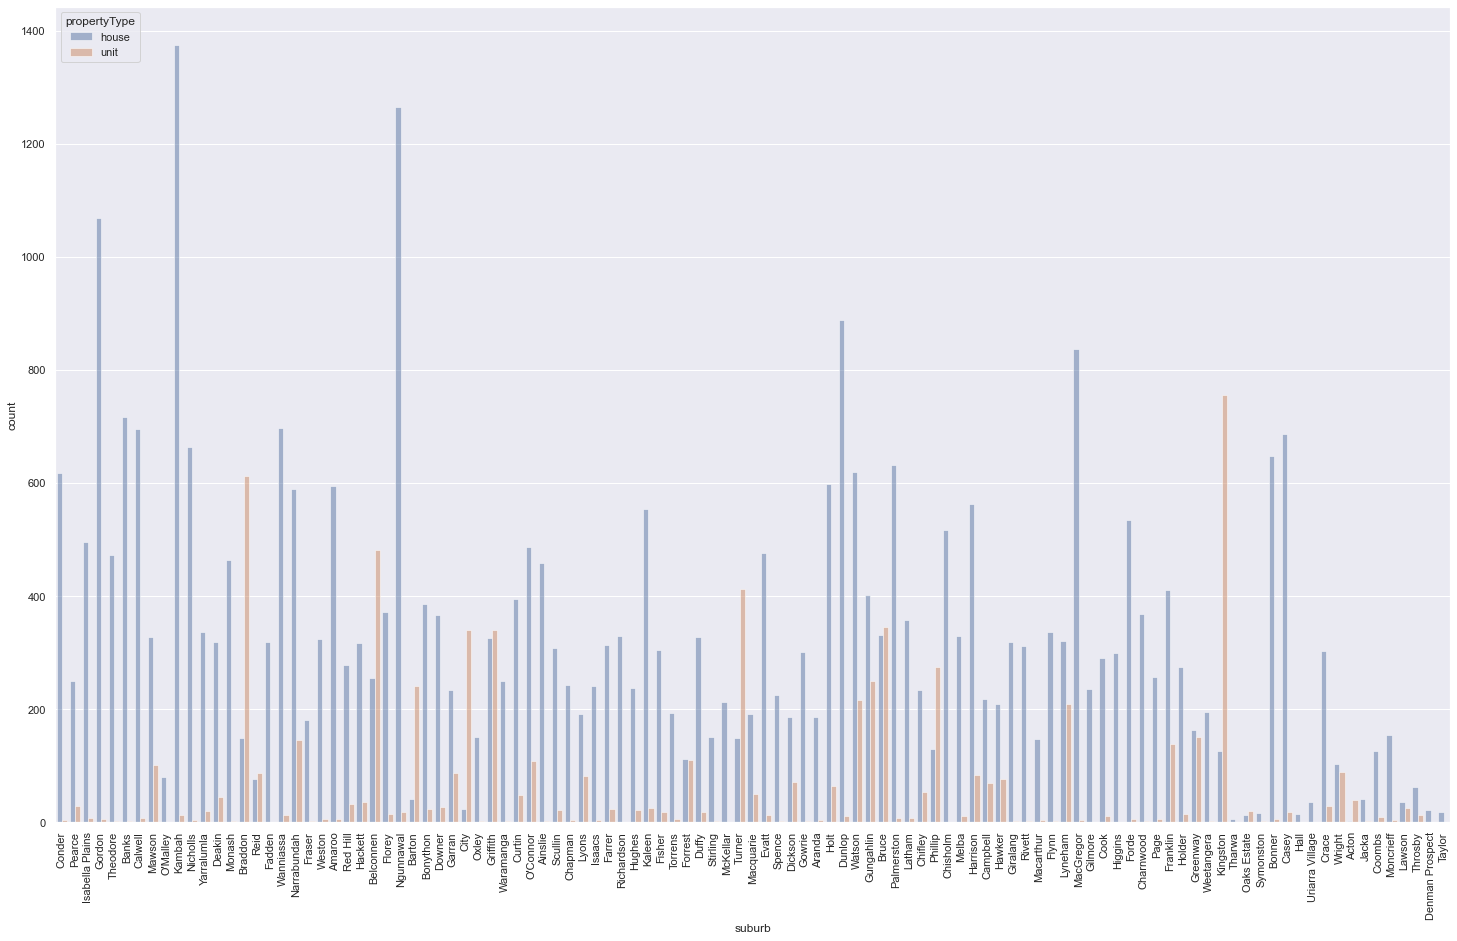

In [94]:
plt.figure(figsize=(25,15))
sns.countplot(df['suburb'], alpha=0.5, hue=df['propertyType'])
plt.xticks(rotation=90)
plt.show()

This bar graph shows the number of real estate sales from 2007 to 2019 based on its suburbs and property type. It can be seen that only few suburbs have unit sales that outweigh its house sales.

In [132]:
df_unit_outweigh = pd.crosstab(index=df['suburb'], columns=df['propertyType'])
df_unit_outweigh.reset_index(inplace=True)
list_unit_outweigh = np.where(df_unit_outweigh['house'] < df_unit_outweigh['unit'], 1, 0)
df_unit_outweigh['unit_outweigh'] = list_unit_outweigh

df_unit_outweigh[df_unit_outweigh['unit_outweigh']==1]

propertyType,suburb,house,unit,unit_outweigh
0,Acton,2,39,1
5,Barton,40,241,1
6,Belconnen,254,482,1
9,Braddon,148,612,1
10,Bruce,331,345,1
18,City,23,339,1
46,Griffith,326,340,1
61,Kingston,126,755,1
79,Oaks Estate,12,20,1
84,Phillip,129,275,1


These are the suburbs that have unit sales outweigh its house sales throughout the period.

In [ ]:
# COBA2

# MASI ERROR
# MAU NYARI SUBURB MANA YG PNJUALAN UNITNYA LEBIH TINGGI DARI PENJUALAN HOUSENYA SECARA OVERAL SELAMA PERIOD INI

suburb_df = df.groupby(['suburb', 'propertyType']).count()[['price']]

# suburb_df
# suburb_df.loc['Acton','house']

list_tes_uniq2 = [df['suburb'].unique()[i] for i in range(df['suburb'].nunique())]

list_suburbs = []
list_price_house = []
list_price_unit = []

# for i in list_tes_uniq2:
#     if suburb_df.loc[i,'house'] < suburb_df.loc[i,'unit']:
#         list_suburbs.append(i)
#         list_price_house.append(suburb_df.loc[i,'house'])
#         list_price_unit.append(suburb_df.loc[i,'unit'])

# for i in list_tes_uniq2:
#     if (suburb_df.loc[i,'house'] < suburb_df.loc[i,'unit'])[0]:
#         list_suburbs.append(i)
#         list_price_house.append(int(suburb_df.loc[i,'house'][0]))
#         list_price_unit.append(int(suburb_df.loc[i,'unit'][0]))

# for i in list_tes_uniq2:
#     print(i)


# for i in list_tes_uniq2:
# #     print(i)
#     if (suburb_df.loc[i,'house'] < suburb_df.loc[i,'unit'])[0]:
#         print(i)
#         list_suburbs.append(i)
#         list_price_house.append(int(suburb_df.loc[i,'house'][0]))
#         list_price_unit.append(int(suburb_df.loc[i,'unit'][0]))


# suburb_df.loc['Kambah','house'] < suburb_df.loc['Kambah','unit']

# suburb_df.loc[:]['price']

# suburb_df[suburb_df.loc['Acton','house']<suburb_df.loc['Acton','unit']].index  # error

# suburb_df.loc['Tharwa','house'] 
# suburb_df.loc['Acton','house'] < suburb_df.loc['Acton','unit']

# (suburb_df.loc['Acton','unit'])[0]

# (suburb_df.loc['Acton','house'] < suburb_df.loc['Acton','unit'])[0]

# (suburb_df.loc['Tharwa','house'] < suburb_df.loc['Tharwa','unit'])

# (int(suburb_df.loc['Tharwa','house'][0])) < 

suburb_df.loc['Tharwa','unit']

In [ ]:
# COBA2

# for i in df['suburb'].unique():
#     print(i)

# list_tes_uniq = list(df['suburb'].unique())

# for i in list_tes_uniq:
#     print(i)

# list_tes_uniq2 = [df['suburb'].unique()[i] for i in range(df['suburb'].nunique())]
# list_tes_uniq2
# df['suburb'].unique()

In [141]:
# 5 Suburbs with the least amount of sales

# latest_yearsold, latest_mean_price
df_suburb_tail = df_suburb.copy()
suburb_tail_syear = [df_suburb_yearsold[df_suburb_yearsold['suburb']==i]['yearsold'].iloc[-1] for i in df_suburb_tail['suburb']]
suburb_tail_sprice = [df_suburb_yearsold[df_suburb_yearsold['suburb']==i]['price'].iloc[-1] for i in df_suburb_tail['suburb']]
df_suburb_tail['latest_yearsold'], df_suburb_tail['latest_mean_price'] = suburb_tail_syear, suburb_tail_sprice

# latest_number_sales
suburb_tail_snum = [df_suburb_yearsold2[df_suburb_yearsold2['suburb']==i]['price'].iloc[-1] for i in df_suburb_tail['suburb']]
df_suburb_tail['latest_number_sales'] = suburb_tail_snum

# latest_num_house, latest_num_unit
list_series_property_2a = [df[(df['suburb']==i) & (df['yearsold']==j)]['propertyType'].value_counts() for i, j in zip(df_suburb_tail['suburb'], df_suburb_tail['latest_yearsold'])]
df_suburb_tail['latest_num_house'], df_suburb_tail['latest_num_unit'] = 0, 0

for i in range(len(list_series_property_2a)):
    if len(list_series_property_2a[i]) == 1:
        if list_series_property_2a[i].index == 'house':
            df_suburb_tail['latest_num_house'].iloc[i] = list_series_property_2a[i].values
            df_suburb_tail['latest_num_unit'].iloc[i] = 0            
        else:
            df_suburb_tail['latest_num_house'].iloc[i] = 0
            df_suburb_tail['latest_num_unit'].iloc[i] = list_series_property_2a[i].values
    else:
        df_suburb_tail['latest_num_house'].iloc[i] = list_series_property_2a[i][0]
        df_suburb_tail['latest_num_unit'].iloc[i] = list_series_property_2a[i][1]

# latest_ratio_house, latest_ratio_unit
df_suburb_tail.reset_index(drop=True, inplace=True)
list_series_property2 = [round(df[(df['suburb']==i) & (df['yearsold']==j)]['propertyType'].value_counts(normalize=True), 3) for i, j in zip(df_suburb_tail['suburb'], df_suburb_tail['latest_yearsold'])]
df_suburb_tail['latest_ratio_house'], df_suburb_tail['latest_ratio_unit'] = 0, 0

for i in range(len(list_series_property2)):
    if len(list_series_property2[i]) == 1:
        if list_series_property2[i].index == 'house':
            df_suburb_tail['latest_ratio_house'].iloc[i] = list_series_property2[i].values
            df_suburb_tail['latest_ratio_unit'].iloc[i] = 0            
        else:
            df_suburb_tail['latest_ratio_house'].iloc[i] = 0
            df_suburb_tail['latest_ratio_unit'].iloc[i] = list_series_property2[i].values
    else:
        df_suburb_tail['latest_ratio_house'].iloc[i] = list_series_property2[i][0]
        df_suburb_tail['latest_ratio_unit'].iloc[i] = list_series_property2[i][1]

df_suburb_tail.head()

,suburb,amount_of_sales,latest_yearsold,latest_mean_price,latest_number_sales,latest_num_house,latest_num_unit,latest_ratio_house,latest_ratio_unit
0,Kambah,1386,2019,627062.500000,64,63,1,0.984,0.016
1,Ngunnawal,1283,2019,503302.631579,76,74,2,0.974,0.026
2,Gordon,1073,2019,555114.050847,59,58,1,0.983,0.017
3,Dunlop,898,2019,569495.098039,51,50,1,0.980,0.020
4,Kingston,881,2019,707474.727273,44,39,5,0.886,0.114


In [142]:
df_suburb_head.head()

,suburb,amount_of_sales,latest_yearsold,latest_mean_price,latest_number_sales,latest_num_house,latest_num_unit,latest_ratio_house,latest_ratio_unit
0,Kambah,1386,2019,627062.500000,64,63,1,0.984,0.016
1,Ngunnawal,1283,2019,503302.631579,76,74,2,0.974,0.026
2,Gordon,1073,2019,555114.050847,59,58,1,0.983,0.017
3,Dunlop,898,2019,569495.098039,51,50,1,0.980,0.020
4,Kingston,881,2019,707474.727273,44,39,5,0.886,0.114


In [ ]:
df_suburb_yearsold = df.groupby(['suburb', 'yearsold']).mean()[['price']].reset_index()
df_suburb_yearsold[df_suburb_yearsold['suburb']=='Tharwa']['yearsold'].iloc[-1]

In [ ]:
# pd.crosstab(index=df['suburb'], columns=df['propertyType'], normalize=0)

In [ ]:
crosstab1 = pd.crosstab(index=df['suburb'], columns=df['propertyType'])

crosstab1[crosstab1['unit']==0]
crosstab1

In [ ]:
pd.pivot_table(df, index=['suburb', 'yearsold'], columns=['propertyType'], values=['price'], aggfunc=np.mean, fill_value=0)

In [ ]:
df_postcode = df.groupby('postcode').count()['price'].sort_values(ascending=False)
df_postcode = df_postcode.reset_index()
df_postcode.rename(columns={'price': 'amount_of_sales'}, inplace=True)


df_postcode

In [ ]:
# plt.figure(figsize=(20,10))
# sns.barplot(df_postcode['postcode'], df_postcode['amount_of_sales'], alpha=0.5)
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df['postcode'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df['postcode'], hue=df['propertyType'])
plt.xticks(rotation=90)
plt.show()

DISINI YG UNIT NYA TERJUAL LEBIH BNYAK KETIMABNG HOUSENYA ADALAH POSTCODE DENGAN CODE 2604

In [ ]:
df[df['postcode']==2604]['suburb'].value_counts()  # ini 2 suburbs dengan postcode 2604, dimana dalam kedua suburbs ini penjualan unitnya paling bnyak

In [ ]:
df[df['postcode']==2604].groupby(['suburb', 'propertyType']).count()

In [ ]:
df['postcode'].value_counts()

In [ ]:
# df.groupby(['Survived'])['cabin_null'].mean()

In [ ]:
# for i in df.columns:
#     plt.figure(figsize = (10,10))
#     sns.distplot(df[i])
#     plt.show()

plt.figure(figsize = (10,10))
sns.distplot(df['postcode'], kde=False)
plt.show()

In [ ]:
plt.figure(figsize = (16,8))
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.groupby('postcode').mean()

In [ ]:
df['postcode'].unique(), df['postcode'].nunique()

In [ ]:
df['suburb'].unique(), df['suburb'].nunique()